In [67]:
import tensorflow as tf
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib  # 文件保存为png + 文件读取为png

In [63]:
# 文件地址：
img_path = glob.glob( r'D:\SGDownload\611_早上\未命名(2)\未命名(2)_大图\待处理png图\whole.png' )
img_path

['D:\\SGDownload\\611_早上\\未命名(2)\\未命名(2)_大图\\待处理png图\\whole.png']

In [64]:
# 文件读取：
img = tf.io.read_file(img_path[0])  # 记得是列表，必须加[0]
img = tf.image.decode_png(img, channels = 3)
img = img.numpy()

In [68]:
img.shape

(14463, 24064, 3)

### 1. 获取必要信息：

In [80]:
# 每个子图计划高、宽（不够自动填补）：公共参数
new_height = 256
new_width = 256
# 获取图像参数：公共参数
(height, width, channel) = img.shape
row_total = math.ceil( height / new_height )
col_total = math.ceil( width / new_width )

### 2. 图像分割 + 保存每个分割子图：

In [81]:
# 图像分块函数：传入一张原始大图，返回分割后的子图列表
def splitimg(img): 
    # 分割：一行一行分；每行最后一个宽度值较小！
    img_split = [] 
    for x in range(row_total):
        for y in range(col_total):
            if (x != row_total - 1) & (y != col_total - 1):
                tmp = img[x*new_height:(x+1)*new_height, y*new_width:(y+1)*new_width, :]
            else:
                tmp = img[x*new_height:(x+1)*new_height, y*new_width:(y+1)*new_width, :]
            img_split.append(tmp)
    return img_split

# 分块后保存为png文件函数：从左到用，从上到下
def saveimg(img_split):
    # 存储原地址：
    path = 'D:/SGDownload/611_早上/未命名(2)/未命名(2)_大图/待处理png图/大图分割后的png/'
    total = len(img_split)
    # 保存：
    for x in range(total):
        matplotlib.image.imsave( path + 'subimg_{}.png'.format(x), img_split[x] )

In [82]:
# 分割：
img_split = splitimg(img)
# 保存：
saveimg(img_split)

### 3. 文件读取 + 合并：

In [83]:
# 图像拼合函数2：读取子图文件，返回合并后的一张大图
# 输入：无；  输出：一张合并好的图像
# 合并方式：同recoverimg1，只需多生成一个img_split即可
def recoverimg2():
    
    # 所有子图的地址：
    # 地址文件需要排序（提取那个“数值”）：原始的是1, 10, 100 ...
    all_image_path = glob.glob( r'D:\SGDownload\611_早上\未命名(2)\未命名(2)_大图\待处理png图\大图分割后的png\*' ) 
    all_image_path = sorted(all_image_path, key = lambda x:int(x.split('\\')[-1].split('.')[0].split('_')[-1]) )  # 记得加int!
    total = len(all_image_path)
    
    # 生成img_split
    img_split = [] 
    for x in range(total):
        img = matplotlib.image.imread(all_image_path[x], format = 'PNG')  # 读取文件并解码：返回的是数组！
        img = img[:,:,0:3]    # 最后的一个“透明度”通道去掉
        img_split.append(img)
     
    # 合并：
    # 每行合并：
    img_row = [] 
    for x in range(row_total):
        tmp = np.concatenate( img_split[x*col_total:(x+1)*col_total], axis = 1 )
        img_row.append(tmp)  # 共10行，故共10个合并后的元素  
    # 所有行合并：
    img_recover = np.concatenate(img_row, axis = 0)
    
    return img_recover

In [84]:
# 恢复：
img_recover2 = recoverimg2()
img_recover2.shape

(14463, 24064, 3)

In [90]:
24064 / 256

94.0

In [93]:
# 最小图片尺寸：在最后一行！
img_split[5357].shape

(127, 256, 3)

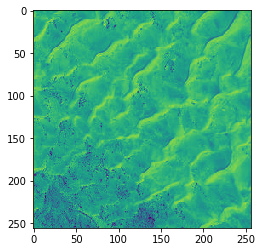

In [99]:
plt.imshow( img_split[0][:,:,0] / 127.5 -1 )